# Objective:- This is a usecase where we need to predict whether or not to approve a loan based on the past information of the person.

In [1]:
#importing libraries for visiualizing and understanding dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Reading data
loan_df=pd.read_csv('loan.csv')

# Finding insights of the dataset and what it consist of

In [3]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Attribute Information

Loan ID: The ID given by the bank to the loan request.
 
Gender: The gender of the primary applicant.
    
Married: Binary variable indicating the marital status of the primary applicant.

Dependents: Number of dependents of the primary applicant.
    
Education: Binary variable indicating whether or not the primary applicant has graduated high school.
    
Self_Employed: Binary variable indicating whether or not the individual is self-employed.
    
Applicant Income: The income of the primary applicant.
    
Co-Applicant Income: The income of the co-applicant.

Loan Amount: The amount the applicant wants to borrow.

Loan Amount Term: The term over which the applicant would repay the loan.

Credit History: Binary variable representing whether the client had a good history or a bad history.

Property Area: Categorical variable indicating whether the applicant was from an urban, semiurban, or a rural area.

Loan Status: Variable indicating whether the loan was approved or denied. This will be our output (dependent) variable.    

In [5]:
#finding the numbers of rows and columns
loan_df.shape

(614, 13)

In [6]:
#finding the information about the data
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#finding what are the different gender present in the dataset
print(loan_df['Gender'].unique())
#finding number of values with a prticular gender
print("\n")
print(loan_df['Gender'].value_counts())

['Male' 'Female' nan]


Male      489
Female    112
Name: Gender, dtype: int64


In [8]:
#finding what are the different Education Qualification present in the dataset
print(loan_df['Education'].unique())
#finding number of values with a prticular gender
print("\n")
print(loan_df['Education'].value_counts())

['Graduate' 'Not Graduate']


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


In [9]:
#finding what are the different Property Area present in the dataset
print(loan_df['Property_Area'].unique())
#finding number of values with a prticular gender
print("\n")
print(loan_df['Property_Area'].value_counts())

['Urban' 'Rural' 'Semiurban']


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [10]:
#finding what are the different Dependents present in the dataset
print(loan_df['Dependents'].unique())
#finding number of values with a prticular gender
print("\n")
print(loan_df['Dependents'].value_counts())

['0' '1' '2' '3+' nan]


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [11]:
#finding what are the different Self_Employed present in the dataset
print(loan_df['Self_Employed'].unique())
#finding number of values with a prticular gender
print("\n")
print(loan_df['Self_Employed'].value_counts())

['No' 'Yes' nan]


No     500
Yes     82
Name: Self_Employed, dtype: int64


In [12]:
#finding what are the different Loan_Amount_Term present in the dataset
print(loan_df['Loan_Amount_Term'].unique())
#finding number of values with a prticular gender
print("\n")
print(loan_df['Loan_Amount_Term'].value_counts())

[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


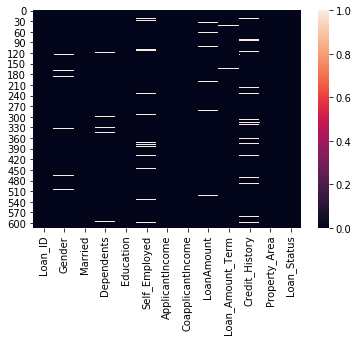

In [13]:
#Checking null values
sns.heatmap(loan_df.isnull())

In [14]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
#the above output shows that there are lot of nan values present in the dataset

Removing nan/Null values

In [16]:
#taking the mode of the gender column and replacing the nan values with mode of the column
gen_mode= loan_df['Gender'].mode()
print(gen_mode)
loan_df['Gender']=loan_df['Gender'].fillna(gen_mode[0])
print(loan_df['Gender'].unique())

0    Male
dtype: object
['Male' 'Female']


In [17]:
#taking the mode of the married column and replacing the nan values with mode of the column
mrd_mode= loan_df['Married'].mode()
print(mrd_mode)
loan_df['Married']=loan_df['Married'].fillna(mrd_mode[0])
print(loan_df['Married'].unique())

0    Yes
dtype: object
['No' 'Yes']


In [18]:
#taking the mode of the  Dependents column and replacing the nan values with mode of the column
depend_mode= loan_df['Dependents'].mode()
print(depend_mode)
loan_df['Dependents']=loan_df['Dependents'].fillna(depend_mode[0])
print(loan_df['Dependents'].unique())

0    0
dtype: object
['0' '1' '2' '3+']


In [19]:
#taking the mode of the Self_Employed  column and replacing the nan values with mode of the column
self_emp_mode= loan_df['Self_Employed'].mode()
print(self_emp_mode)
loan_df['Self_Employed']=loan_df['Self_Employed'].fillna(self_emp_mode[0])
print(loan_df['Self_Employed'].unique())

0    No
dtype: object
['No' 'Yes']


In [20]:
#taking the mean of the column loan_amount and replacing the nan values with it
loan_amt_mean=loan_df['LoanAmount'].mean()
print(loan_amt_mean)
loan_df['LoanAmount']=loan_df['LoanAmount'].fillna(loan_amt_mean)
print(loan_df['LoanAmount'].unique())

146.41216216216216
[146.41216216 128.          66.         120.         141.
 267.          95.         158.         168.         349.
  70.         109.         200.         114.          17.
 125.         100.          76.         133.         115.
 104.         315.         116.         112.         151.
 191.         122.         110.          35.         201.
  74.         106.         320.         144.         184.
  80.          47.          75.         134.          96.
  88.          44.         286.          97.         135.
 180.          99.         165.         258.         126.
 312.         136.         172.          81.         187.
 113.         176.         130.         111.         167.
 265.          50.         210.         175.         131.
 188.          25.         137.         160.         225.
 216.          94.         139.         152.         118.
 185.         154.          85.         259.         194.
  93.         370.         182.         650.         

In [21]:
#taking the mode of the Loan_Amount_Term column and replacing the nan values with mode of the column
LAT_mode= loan_df['Loan_Amount_Term'].mode()
print(LAT_mode)
loan_df['Loan_Amount_Term']=loan_df['Loan_Amount_Term'].fillna(LAT_mode[0])
print(loan_df['Loan_Amount_Term'].unique())

0    360.0
dtype: float64
[360. 120. 240. 180.  60. 300. 480.  36.  84.  12.]


In [22]:
#taking the mode of the Credit_History column and replacing the nan values with mode of the column
cred_mode= loan_df['Credit_History'].mode()
print(cred_mode)
loan_df['Credit_History']=loan_df['Credit_History'].fillna(cred_mode[0])
print(loan_df['Credit_History'].unique())

0    1.0
dtype: float64
[1. 0.]


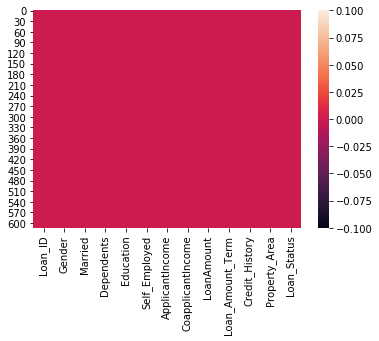

In [23]:
#ReChecking null values
sns.heatmap(loan_df.isnull())

In [24]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
#therefore there is no null values presnet

# Bivariate Analysis

Text(0.5, 1.0, 'Loan Approval W.R.T Loan Rejection')

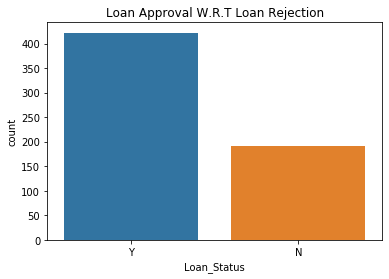

In [26]:
sns.countplot(loan_df['Loan_Status'])
plt.title('Loan Approval W.R.T Loan Rejection')

#hence we can say that chances of loan getting approved is high if all the documents are correct

Text(0.5, 1.0, 'Loan Approval W.R.T Gender')

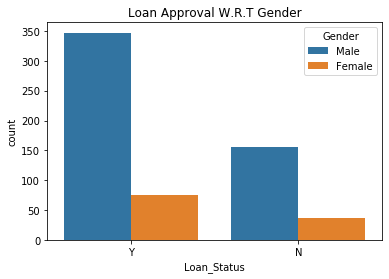

In [27]:
sns.countplot(loan_df['Loan_Status'],hue=loan_df['Gender'])
plt.title('Loan Approval W.R.T Gender')

Text(0.5, 1.0, 'Loan Approval W.R.T Marital Status')

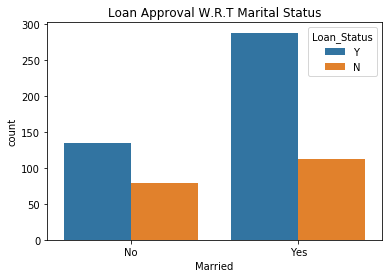

In [28]:
sns.countplot(loan_df['Married'],hue=loan_df['Loan_Status'])
plt.title('Loan Approval W.R.T Marital Status')

if the applicant is married the chances of getting loan approved is high

Text(0.5, 1.0, 'Loan Approval W.R.T Number of Dependents')

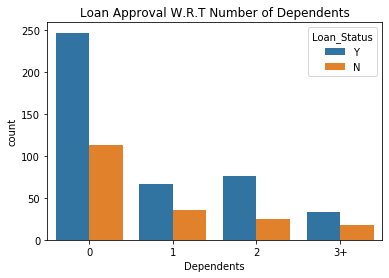

In [29]:
sns.countplot(loan_df['Dependents'],hue=loan_df['Loan_Status'])
plt.title('Loan Approval W.R.T Number of Dependents')

Text(0.5, 1.0, 'Loan Approval W.R.T Educational Qualification')

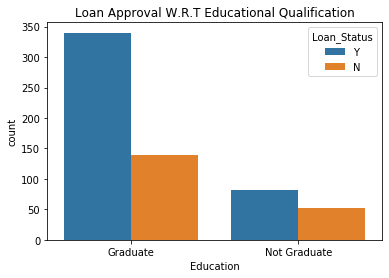

In [30]:
sns.countplot(loan_df['Education'],hue=loan_df['Loan_Status'])
plt.title('Loan Approval W.R.T Educational Qualification')

Text(0.5, 1.0, 'Loan Approval W.R.T Employment')

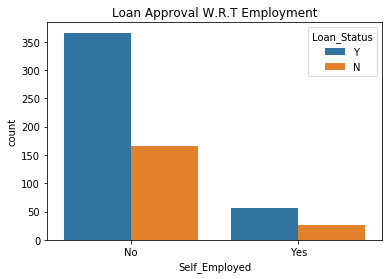

In [31]:
sns.countplot(loan_df['Self_Employed'],hue=loan_df['Loan_Status'])
plt.title('Loan Approval W.R.T Employment')

if you are self employed the chances of getting your loan approved is less

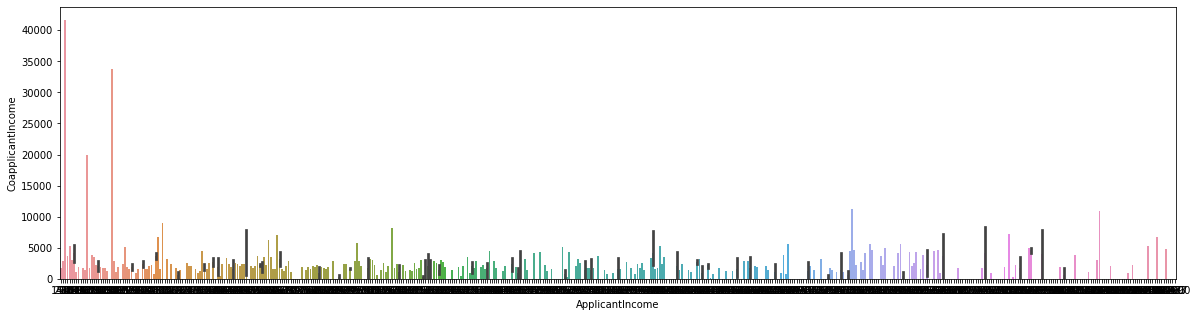

In [32]:
plt.figure(figsize=(20,5))
sns.barplot(loan_df['ApplicantIncome'],loan_df['CoapplicantIncome'])

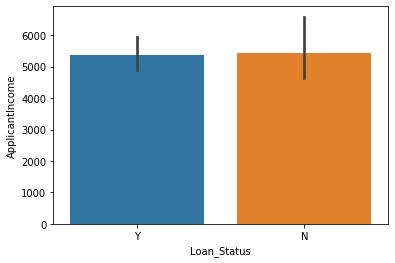

In [33]:
sns.barplot(loan_df['Loan_Status'],loan_df['ApplicantIncome'])

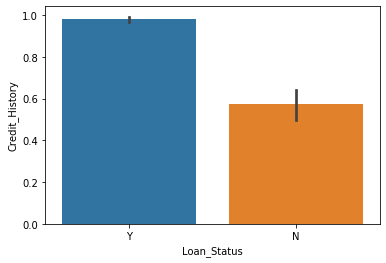

In [34]:
sns.barplot(loan_df['Loan_Status'],loan_df['Credit_History'])

as good the credit history as good the chances of getting loan approved

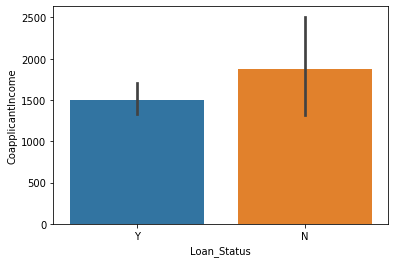

In [35]:
sns.barplot(loan_df['Loan_Status'],loan_df['CoapplicantIncome'])

Text(0.5, 1.0, 'Loan Approval W.R.T Property_Area')

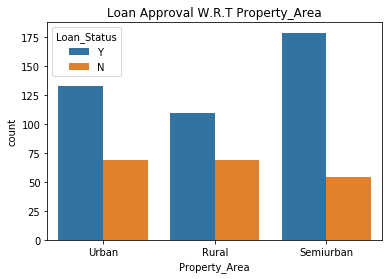

In [36]:
sns.countplot(loan_df['Property_Area'],hue=loan_df['Loan_Status'])
plt.title('Loan Approval W.R.T Property_Area')

# Changing the categorical column 'values' to numeric 'values' using 'LABEL ENCODER'

In [37]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [38]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [39]:
columns=(lb.fit_transform(loan_df['Gender']),lb.fit_transform(loan_df['Married']),lb.fit_transform(loan_df['Dependents']),lb.fit_transform(loan_df['Education']),lb.fit_transform(loan_df['Self_Employed']),lb.fit_transform(loan_df['Property_Area']),lb.fit_transform(loan_df['Loan_Status']))

In [40]:
loan_df['Gender']=columns[0]
loan_df['Married']=columns[1]
loan_df['Dependents']=columns[2]
loan_df['Education']=columns[3]
loan_df['Self_Employed']=columns[4]
loan_df['Property_Area']=columns[5]
loan_df['Loan_Status']=columns[6]

In [41]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [42]:
#now every categorical column has been converted into numeric column

In [43]:
#dropping the loan_id column as it is not requried for predicting whether or not to approve a loan 
loan_df.drop(['Loan_ID'],axis=1,inplace=True)

In [44]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [45]:
#column succefully dropped

# Univariate Analysis

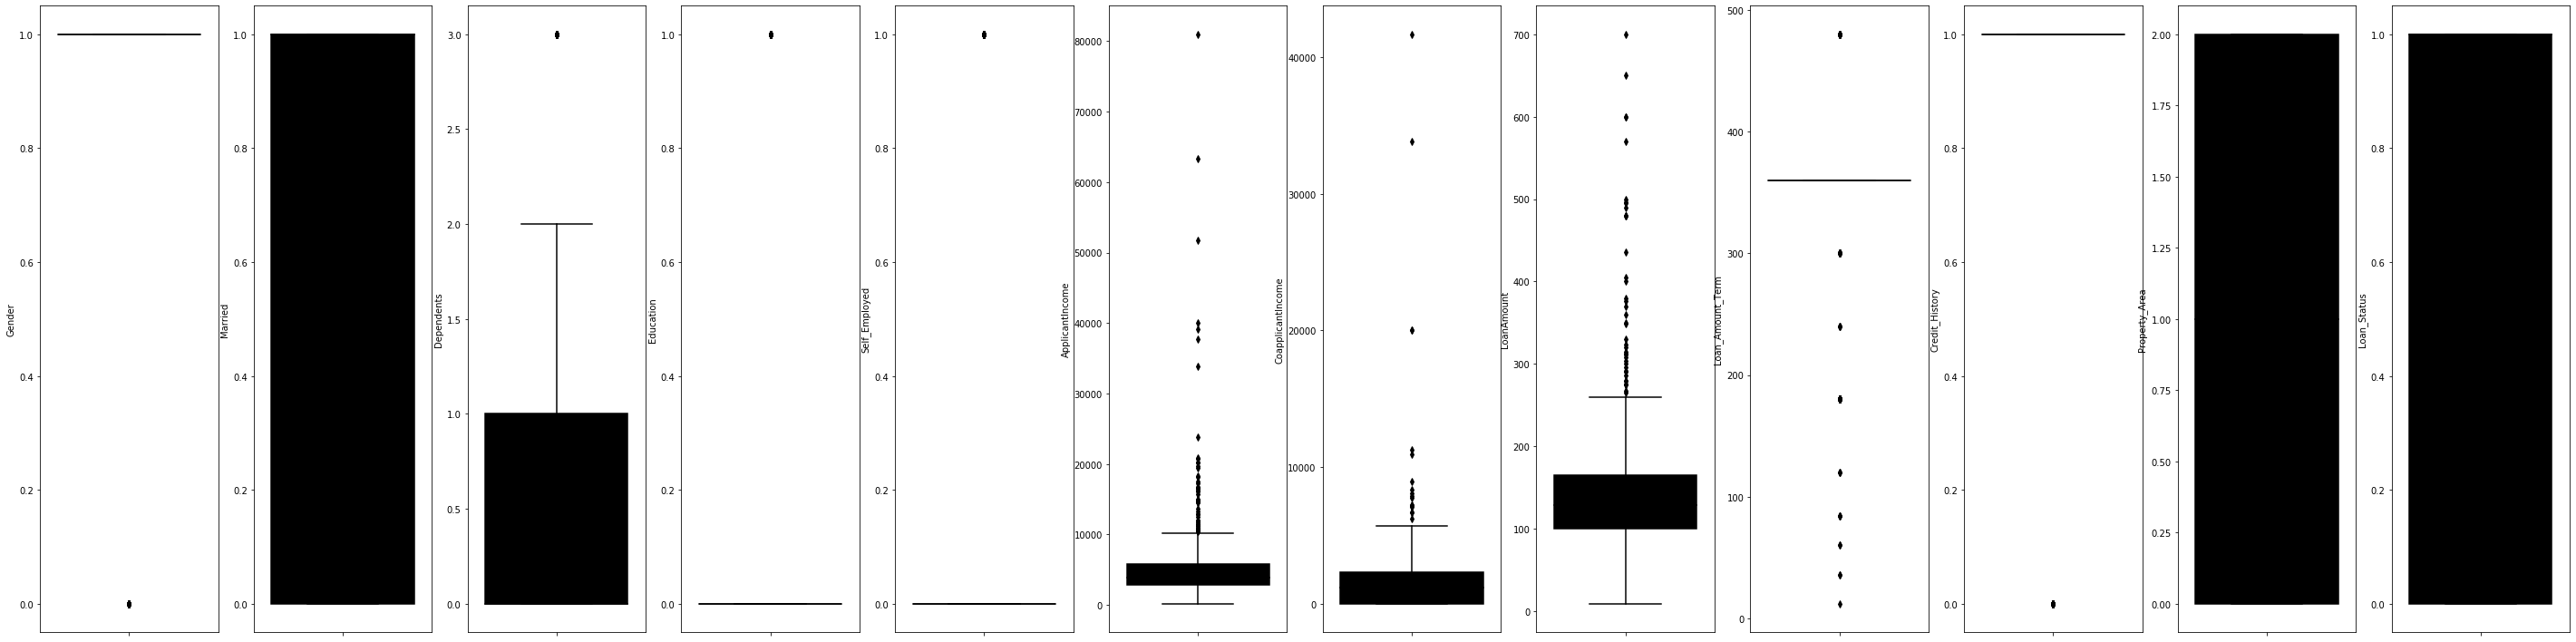

In [46]:
#using boxplot to see outliers and IQR range
collist=loan_df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(50,150))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(loan_df[collist[i]],color='black',orient='v')

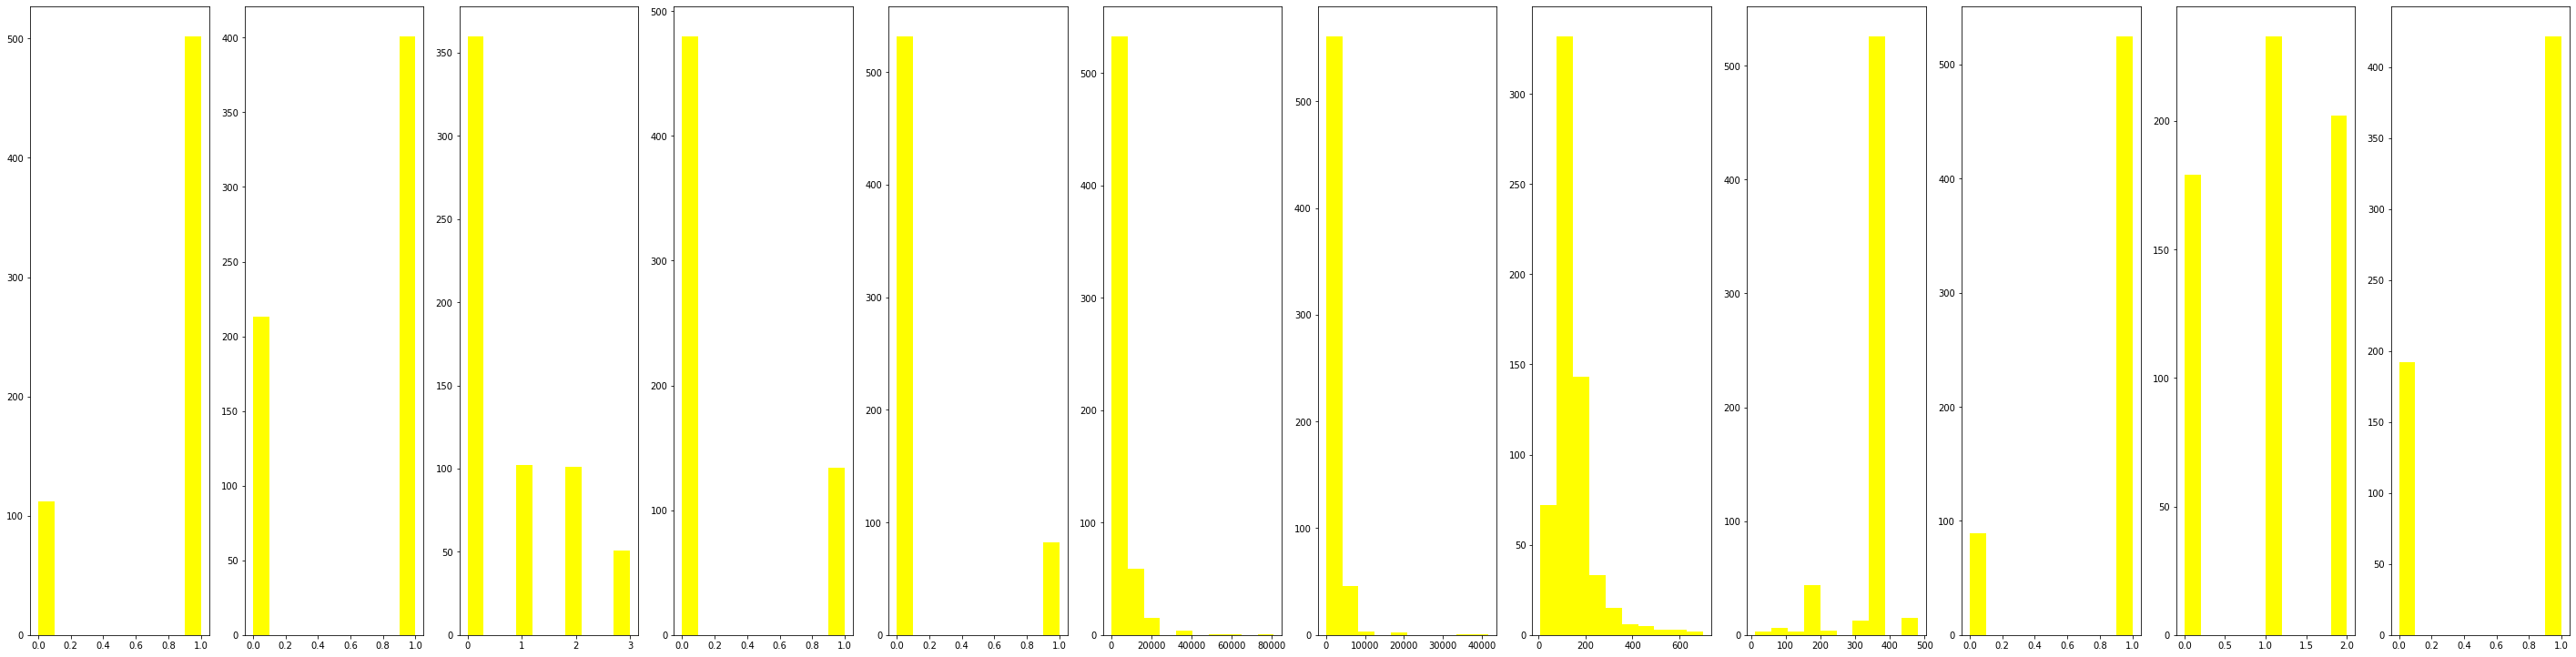

In [47]:
#using histplot to see thhe distribution 
plt.figure(figsize=(50,150))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    plt.hist(loan_df[collist[i]],color='yellow')

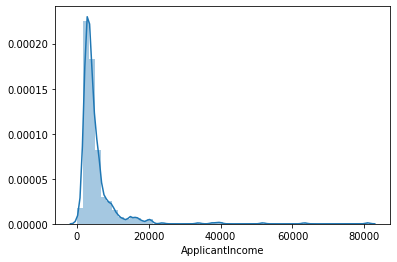

In [48]:
sns.distplot(loan_df['ApplicantIncome'])

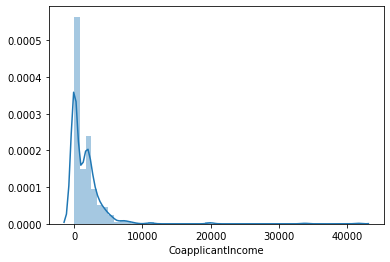

In [49]:
sns.distplot(loan_df['CoapplicantIncome'])

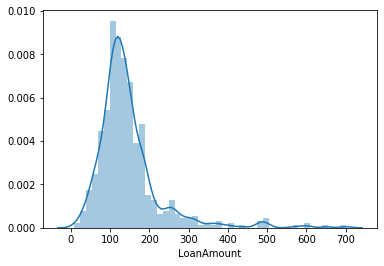

In [50]:
sns.distplot(loan_df['LoanAmount'])

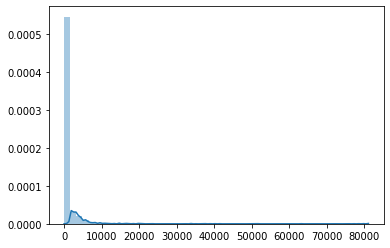

In [51]:
sns.distplot(loan_df)

# Statistical Analysis

In [52]:
loan_df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


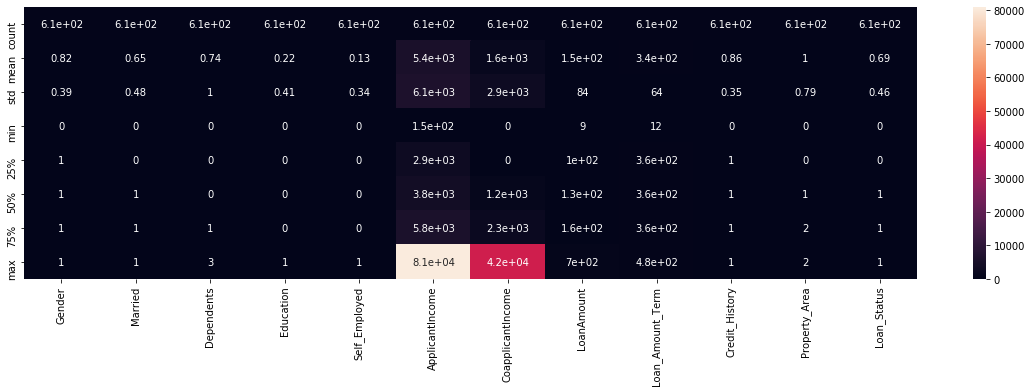

In [53]:
plt.figure(figsize=(20,5))
sns.heatmap(loan_df.describe(),annot=True)

In [54]:
loan_df_cor=loan_df.corr()

In [55]:
loan_df_cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


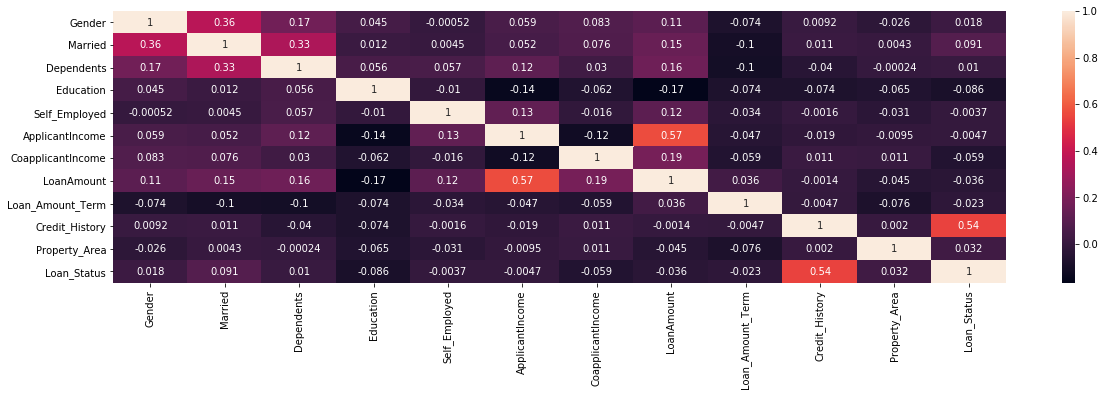

In [56]:
plt.figure(figsize=(20,5))
sns.heatmap(loan_df_cor,annot=True)

In [57]:
#checking the skewness
loan_df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [58]:
#the dataset is positively skewed as well as negatively skewed

# Removing outliers and skewness from the dataset

In [59]:
from scipy.stats import zscore
z=np.abs(zscore(loan_df))
print(z)

[[0.47234264 1.37208932 0.73780632 ... 0.41173269 1.22329839 0.67451931]
 [0.47234264 0.72881553 0.25346957 ... 0.41173269 1.31851281 1.48253724]
 [0.47234264 0.72881553 0.73780632 ... 0.41173269 1.22329839 0.67451931]
 ...
 [0.47234264 0.72881553 0.25346957 ... 0.41173269 1.22329839 0.67451931]
 [0.47234264 0.72881553 1.24474546 ... 0.41173269 1.22329839 0.67451931]
 [2.11710719 1.37208932 0.73780632 ... 2.42876026 0.04760721 1.48253724]]


In [60]:
threhold=3

In [61]:
print(np.where(z>3))#printing all the value position which are greater than the threshold value

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [62]:
z[9][6] #checking the above output result 

3.196712546212882

In [63]:
loan_new=loan_df[(z<3).all(axis=1)]  #removing outliers

In [64]:
print("Shape of the dataset before removing outliers",loan_df.shape)
print("\n \n")
print("Shape of the dataset after removing the outliers",loan_new.shape)

Shape of the dataset before removing outliers (614, 12)

 

Shape of the dataset after removing the outliers (577, 12)


In [65]:
#after removing dataset we are left with 577 rows

In [66]:
#checking skewness after removing outliers
loan_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [67]:
#removing the Skewness
for i in range(0,len(collist)):
    if loan_new.skew().loc[collist[i]]>0.55:
        loan_new[collist[i]]=np.sqrt(loan_new[collist[i]])

In [68]:
#recheking the skewness
loan_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.610338
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      1.208613
CoapplicantIncome    0.207591
LoanAmount           0.320372
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [69]:
for i in range(0,len(collist)):
    if loan_new.skew().loc[collist[i]]>0.55:
        loan_new[collist[i]]=np.sqrt(loan_new[collist[i]])

In [70]:
#recheking the skewness
loan_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.457371
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.638310
CoapplicantIncome    0.207591
LoanAmount           0.320372
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

# Splitting the data into training and testing sets

In [71]:
loan_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0.0,0.0,8.745213,0.000000,12.100089,360.0,1.0,2,1
1,1,1,1.0,0.0,0.0,8.227871,38.832976,11.313708,360.0,1.0,0,0
2,1,1,0.0,0.0,1.0,7.400828,0.000000,8.124038,360.0,1.0,2,1
3,1,1,0.0,1.0,0.0,7.129041,48.559242,10.954451,360.0,1.0,2,1
4,1,0,0.0,0.0,0.0,8.801117,0.000000,11.874342,360.0,1.0,2,1


In [72]:
x=loan_new.iloc[:,:-1]

In [73]:
x.shape

(577, 11)

In [74]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,0.0,0.0,8.745213,0.000000,12.100089,360.0,1.0,2
1,1,1,1.0,0.0,0.0,8.227871,38.832976,11.313708,360.0,1.0,0
2,1,1,0.0,0.0,1.0,7.400828,0.000000,8.124038,360.0,1.0,2
3,1,1,0.0,1.0,0.0,7.129041,48.559242,10.954451,360.0,1.0,2
4,1,0,0.0,0.0,0.0,8.801117,0.000000,11.874342,360.0,1.0,2


In [75]:
y=loan_new.iloc[:,-1]

In [76]:
y.shape

(577,)

In [77]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

as the dataset is already scaled skiipping scaling of the dataset

In [78]:
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc


In [79]:
# finding best random state
max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    lg.score(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print("Accuracy SCORE is equal to :",acc_score,"at random state",i)
    if acc_score > max_score:
        max_score=acc_score
        final_rstate=i   
print("The maximum Accuracy_score is ",max_score, "at random state",final_rstate)

Accuracy SCORE is equal to : 0.8413793103448276 at random state 42
Accuracy SCORE is equal to : 0.8 at random state 43
Accuracy SCORE is equal to : 0.8068965517241379 at random state 44
Accuracy SCORE is equal to : 0.8 at random state 45
Accuracy SCORE is equal to : 0.8137931034482758 at random state 46
Accuracy SCORE is equal to : 0.8137931034482758 at random state 47
Accuracy SCORE is equal to : 0.8068965517241379 at random state 48
Accuracy SCORE is equal to : 0.8068965517241379 at random state 49
Accuracy SCORE is equal to : 0.8137931034482758 at random state 50
Accuracy SCORE is equal to : 0.8068965517241379 at random state 51
Accuracy SCORE is equal to : 0.8620689655172413 at random state 52
Accuracy SCORE is equal to : 0.8 at random state 53
Accuracy SCORE is equal to : 0.7724137931034483 at random state 54
Accuracy SCORE is equal to : 0.8551724137931035 at random state 55
Accuracy SCORE is equal to : 0.8344827586206897 at random state 56
Accuracy SCORE is equal to : 0.806896551

In [80]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=68)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(432, 11) (145, 11) (432,) (145,)


# Testing the Algorithms and finding the the best parameters using Grid Search cv

In [81]:
#best parameter for Logistic Regression
from sklearn.model_selection import GridSearchCV
lrg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lrg,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'penalty': 'l2'}

In [82]:
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gd=GridSearchCV(svc,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'C': 1, 'kernel': 'linear'}

In [83]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(knn,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'n_neighbors': 10}

In [84]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY_SCORE = 0.8827586206896552


CROSS_VAL_SCORE = 0.8181488203266788


ROC_AUC_SCORE = 0.78060413354531


 
 Classification Report 
                precision    recall  f1-score   support

           0       0.87      0.59      0.70        34
           1       0.89      0.97      0.93       111

    accuracy                           0.88       145
   macro avg       0.88      0.78      0.81       145
weighted avg       0.88      0.88      0.87       145



[[ 20  14]
 [  3 108]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)

 
 



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_feat

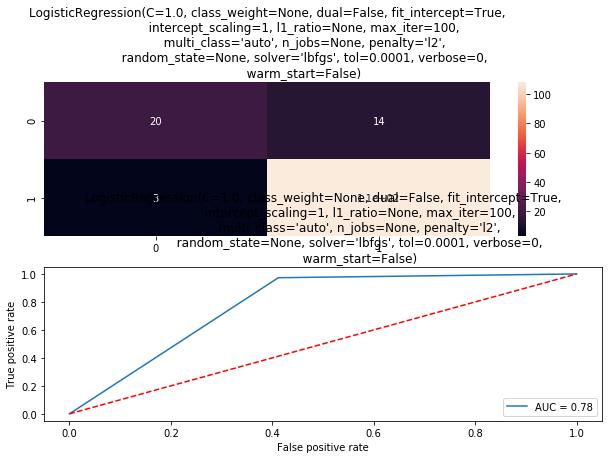

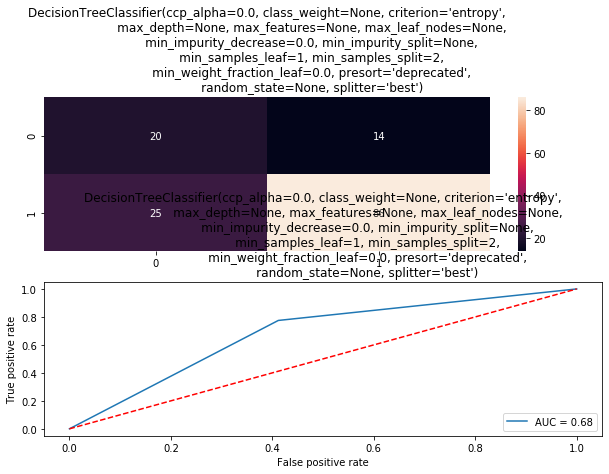

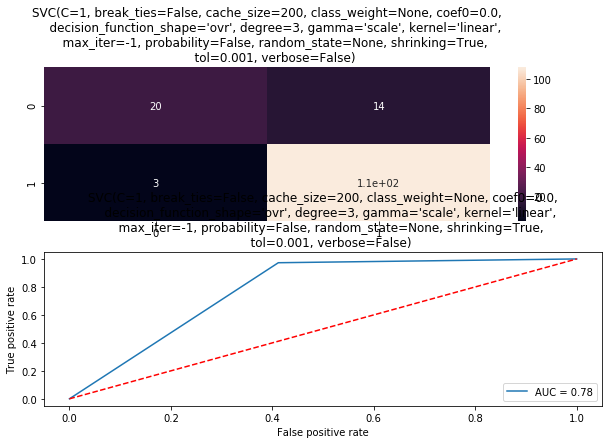

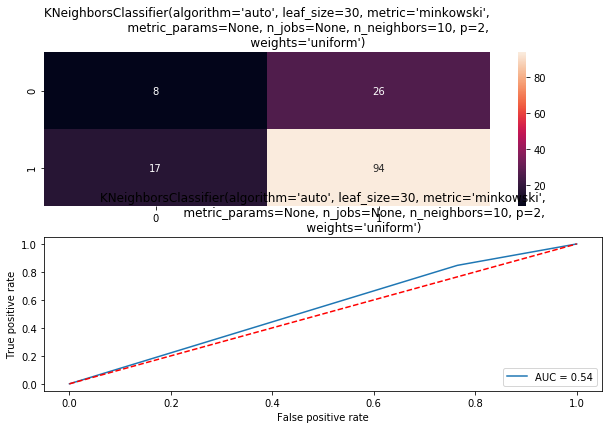

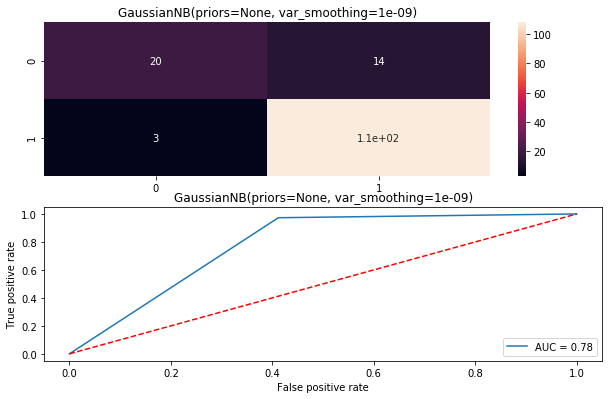

In [85]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LogisticRegression(penalty='l2'),DecisionTreeClassifier(criterion='entropy'),SVC(C=1,kernel='linear'),KNeighborsClassifier(n_neighbors=10),GaussianNB()]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    acc_score=accuracy_score(y_test,prediction)
    print("ACCURACY_SCORE =",acc_score)
    score.append(acc_score*100)
    print("\n")
    cv_score=cross_val_score(models,x,y,cv=10, scoring='accuracy').mean()
    print("CROSS_VAL_SCORE =",cv_score)
    cvs.append(cv_score*100)
    print("\n")
    false_positive_rate, true_positive_rate,  thresholds=roc_curve(y_test,prediction)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_SCORE =",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print(" \n Classification Report \n ",classification_report(y_test,prediction))
    print("\n")
    cm=confusion_matrix(y_test,prediction)
    print(cm)
    print("\n") 
    plt.figure(figsize=(10,30))
    plt.subplot(911)
    plt.title(models)
    print(sns.heatmap(cm,annot=True))   
    plt.subplot(912)
    plt.title(models)      
    plt.plot(false_positive_rate, true_positive_rate, label= "AUC = %0.2f" % roc_auc)
    plt.plot([0,1],[0,1],'r--') 
    plt.legend(loc='lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n \n \n")
          
    

    

In [86]:
outcome=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','SVC','KNeighborsClassifier','GaussianNB'],'Accuracy_Score':[0.8827,0.7448,0.8827,0.7034,0.8827],'Cross_Val_Sore':[0.8181,0.7433,0.8181,0.6861,0.8146],'Roc_Auc_Score':[0.7806,0.7211,0.7806,0.5410,0.7806]})
outcome

,Model,Accuracy_Score,Cross_Val_Sore,Roc_Auc_Score
0,LogisticRegression,0.8827,0.8181,0.7806
1,DecisionTreeClassifier,0.7448,0.7433,0.7211
2,SVC,0.8827,0.8181,0.7806
3,KNeighborsClassifier,0.7034,0.6861,0.5410
4,GaussianNB,0.8827,0.8146,0.7806


In [87]:
#Hence it is observed that SVC is giving a good result, therefore finalizing it and applying Boosting techniqur to enhance the accuracy score

In [88]:
svc=SVC(C=1, kernel='linear')
svc.fit(x_train,y_train)
prediction=svc.predict(x_test)
acc_score=accuracy_score(prediction,y_test)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(svc,x,y,cv=5,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

Accuracy Score = 0.8827586206896552
The Cross Val Score = 0.8180809595202397


In [89]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [91]:
ada=AdaBoostClassifier(base_estimator=svc, n_estimators=100,algorithm='SAMME')
ada.fit(x_train,y_train)
ada.score(x_train,y_train)

0.7083333333333334

In [92]:
adapred=ada.predict(x_test)
acc_score=accuracy_score(adapred,y_test)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(gbc,x,y,cv=10,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

Accuracy Score = 0.7862068965517242
The Cross Val Score = 0.7904718693284936


In [93]:
gbc=GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)

0.8912037037037037

In [94]:
gbcpred=gbc.predict(x_test)
acc_score=accuracy_score(gbcpred,y_test)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(gbc,x,y,cv=10,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

Accuracy Score = 0.8551724137931035
The Cross Val Score = 0.7904718693284936


In [98]:
from sklearn.externals import joblib
joblib.dump(svc,"svc_Loan.pkl")

['svc_Loan.pkl']